In [1]:
## Imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col  = 0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col  = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col  = 0)

In [9]:
# We create a new pandas dataframe without the reference categories
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_earliest_issue_d:<38',
'mths_since_earliest_issue_d:38-39',
'mths_since_earliest_issue_d:40-41',
'mths_since_earliest_issue_d:42-48',
'mths_since_earliest_issue_d:49-52',
'mths_since_earliest_issue_d:53-64',
'mths_since_earliest_issue_d:65-84',
'mths_since_earliest_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86']]

In [10]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'initial_list_status:f',
'term:60',
'emp_length:0',
'mths_since_earliest_issue_d:>84',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'delinq_2yrs:>=4',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:0-2',
'total_acc:<=27',
'acc_now_delinq:0',
'total_rev_hi_lim:<=5K',
'annual_inc:<20K',
'dti:>35',
'mths_since_last_delinq:0-3',
'mths_since_last_record:0-2']

In [ ]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)

### Logistic Regression Model without additional scaling

In [12]:
reg = LogisticRegression(max_iter=1000)

In [13]:
pd.options.display.max_rows = None

In [17]:
reg.fit(inputs_train, loan_data_targets_train.values.ravel())

LogisticRegression(max_iter=1000)

In [18]:
feature_name = inputs_train.columns.values

In [19]:
summary_table = pd.DataFrame(columns = ['Feature Name'], data= feature_name)

In [20]:
summary_table['Coefficents'] = np.transpose(reg.coef_)

In [ ]:
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()

#### Building a Logistic Regression with p-values

In [22]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [23]:
reg2 = LogisticRegression_with_p_values(max_iter= 1000)
# We create an instance of an object from the newly created 'LogisticRegression_with_p_values()' class.

In [24]:
reg2.fit(inputs_train, loan_data_targets_train.values.ravel())

In [ ]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()

In [26]:
# This is a list.
p_values = reg2.p_values

In [27]:
p_values = np.append(np.nan, np.array(p_values))

In [28]:
summary_table['p_values'] = p_values
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.

In [29]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-1.979571,NaN
1,grade:A,0.996674,9.202306e-27
2,grade:B,0.877523,1.855336e-47
3,grade:C,0.697416,2.043950e-35
4,grade:D,0.512380,6.640951e-22
5,grade:E,0.351472,1.338510e-13
6,grade:F,0.221669,7.954386e-06
7,home_ownership:OWN,0.088329,1.131824e-05
8,home_ownership:MORTGAGE,0.112188,1.088046e-18
9,addr_state:NM_VA,0.060240,6.201039e-02


#### PD Model Validation

In [30]:
test_inputs_w_refcats = loan_data_inputs_test.loc[: , ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'addr_state:ND_NE_IA_NV_FL_HI_AL',
'addr_state:NM_VA',
'addr_state:NY',
'addr_state:OK_TN_MO_LA_MD_NC',
'addr_state:CA',
'addr_state:UT_KY_AZ_NJ',
'addr_state:AR_MI_PA_OH_MN',
'addr_state:RI_MA_DE_SD_IN',
'addr_state:GA_WA_OR',
'addr_state:WI_MT',
'addr_state:TX',
'addr_state:IL_CT',
'addr_state:KS_SC_CO_VT_AK_MS',
'addr_state:WV_NH_WY_DC_ME_ID',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__wedd__ren_en__mov__house',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:oth__med__vacation',
'purpose:major_purch__car__home_impr',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'mths_since_earliest_issue_d:<38',
'mths_since_earliest_issue_d:38-39',
'mths_since_earliest_issue_d:40-41',
'mths_since_earliest_issue_d:42-48',
'mths_since_earliest_issue_d:49-52',
'mths_since_earliest_issue_d:53-64',
'mths_since_earliest_issue_d:65-84',
'mths_since_earliest_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'mths_since_earliest_cr_line:<140',
'mths_since_earliest_cr_line:141-164',
'mths_since_earliest_cr_line:165-247',
'mths_since_earliest_cr_line:248-270',
'mths_since_earliest_cr_line:271-352',
'mths_since_earliest_cr_line:>352',
'delinq_2yrs:0',
'delinq_2yrs:1-3',
'delinq_2yrs:>=4',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-17',
'open_acc:18-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-4',
'pub_rec:>=5',
'total_acc:<=27',
'total_acc:28-51',
'total_acc:>=52',
'acc_now_delinq:0',
'acc_now_delinq:>=1',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<20K',
'annual_inc:20K-30K',
'annual_inc:30K-40K',
'annual_inc:40K-50K',
'annual_inc:50K-60K',
'annual_inc:60K-70K',
'annual_inc:70K-80K',
'annual_inc:80K-90K',
'annual_inc:90K-100K',
'annual_inc:100K-120K',
'annual_inc:120K-140K',
'annual_inc:>140K',
'dti:<=1.4',
'dti:1.4-3.5',
'dti:3.5-7.7',
'dti:7.7-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-22.4',
'dti:22.4-35',
'dti:>35',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>=57',
'mths_since_last_record:Missing',
'mths_since_last_record:0-2',
'mths_since_last_record:3-20',
'mths_since_last_record:21-31',
'mths_since_last_record:32-80',
'mths_since_last_record:81-86',
'mths_since_last_record:>86']]

In [ ]:
test_inputs = test_inputs_w_refcats.drop(ref_categories, axis=1)
#test_inputs.head()

In [33]:
y_hat_test = reg2.model.predict(test_inputs)

In [34]:
y_hat_test_proba = reg2.model.predict_proba(test_inputs)

In [35]:
y_hat_test_proba = y_hat_test_proba[:][:, 1]

In [37]:
test_targets_temp = loan_data_targets_test
test_targets_temp.reset_index(drop = True, inplace= True)

In [38]:
df_actual_predicted_probs = pd.concat([test_targets_temp, pd.DataFrame(y_hat_test_proba)], axis =1)

In [40]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [41]:
df_actual_predicted_probs.index = loan_data_targets_test.index

### Accuracy and Area Under Curve

In [43]:
# Here the threshold is set to 0.5
tr = 0.5
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs [ 'y_hat_test_proba'] > tr, 1, 0)

In [44]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,4,10166
1,10,83077


In [46]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
                              df_actual_predicted_probs['y_hat_test_proba'])

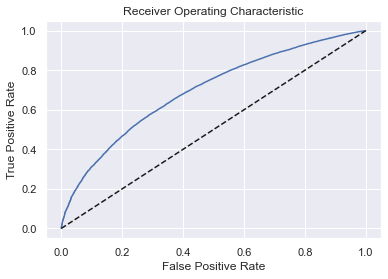

In [47]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle= '--', color = 'k')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [48]:
auroc = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'],
                              df_actual_predicted_probs['y_hat_test_proba'])
auroc

0.6958504424624914

#### Gini and KS 

In [49]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [50]:
df_actual_predicted_probs.reset_index(drop=True, inplace=True,)
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,1,0.334292,0
1,1,0.415453,0
2,0,0.418690,0
3,1,0.424763,0
4,0,0.452093,0


In [51]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()

In [53]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())

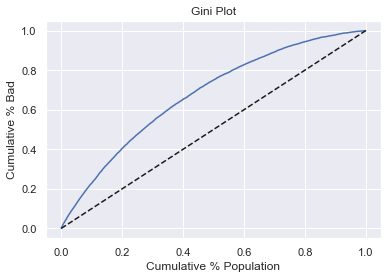

In [55]:
plt.title('Gini Plot')
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
plt.ylabel('Cumulative % Bad')
plt.xlabel('Cumulative % Population')
plt.show()

In [56]:
Gini = auroc * 2 - 1
Gini

0.3917008849249828

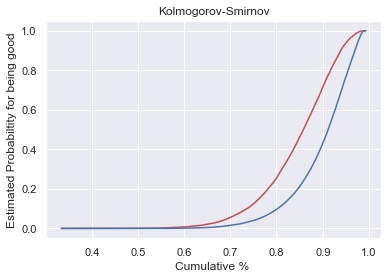

In [57]:
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color ='r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color ='b')
plt.ylabel('Estimated Probabiltity for being good')
plt.xlabel('Cumulative % ')
plt.title('Kolmogorov-Smirnov')
plt.show()

In [58]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.2861185309793449

### Creating a ScoreCard

In [ ]:
df_ref_categories = pd.DataFrame(ref_categories, columns= ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan

In [62]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()

In [63]:
df_scorecard['Original Feature Name'] = df_scorecard['Feature name'].str.split(':').str[0]

In [64]:
min_score = 300
max_score = 850

In [66]:
min_sum_coef = df_scorecard.groupby('Original Feature Name')['Coefficients'].min().sum()
min_sum_coef 

-2.223799262104661

In [67]:
max_sum_coef = df_scorecard.groupby('Original Feature Name')['Coefficients'].max().sum()
max_sum_coef 

5.8808198863951775

In [68]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)

In [69]:
df_scorecard['Score - Calculation'][0] = (df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef) * (max_score - min_score) + min_score

C:\Users\DL379QB\AppData\Local\Temp/ipykernel_5164/3477680335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = (df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef) * (max_score - min_score) + min_score


In [70]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()

In [74]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']

In [75]:
# Adjusting so the min is within the limits
df_scorecard['Score - Final'][75] = -3

C:\Users\DL379QB\AppData\Local\Temp/ipykernel_5164/4292311304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][75] = -3


In [78]:
min_sumscore = df_scorecard.groupby('Original Feature Name')['Score - Final'].min().sum()
min_sumscore

300.0

In [79]:
# Adjusting so the max is within the limits
df_scorecard['Score - Final'][0] = 316

C:\Users\DL379QB\AppData\Local\Temp/ipykernel_5164/3492775277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][0] = 316


In [80]:
max_sumscore = df_scorecard.groupby('Original Feature Name')['Score - Final'].max().sum()
max_sumscore

850.0

#### Calculating credit score

In [83]:
tests_inputs_w_intercept = test_inputs_w_refcats

In [84]:
tests_inputs_w_intercept.insert(0, 'Intercept', 1)

In [86]:
tests_inputs_w_intercept = tests_inputs_w_intercept[df_scorecard['Feature name'].values]

In [ ]:
scorecard_scores = df_scorecard['Score - Final']

In [90]:
scorecard_scores = scorecard_scores.values.reshape(127, 1)

In [ ]:
y_scores = tests_inputs_w_intercept.dot(scorecard_scores)

#### From 'Score' to 'Probability of default'

In [92]:
sum_coef_from_score = ((y_scores - min_score) / (max_score - min_score)) * (max_sum_coef - min_sum_coef) + min_sum_coef

In [ ]:
y_hat_proba_from_score = np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)

#### Setting cut-offs

###### Now to set thresholds for acceptance. Too high and not enough business. Too low, lending to bad debtors

In [96]:
df_cutoffs= pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)

In [97]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']

In [99]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)

In [100]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()
# The score corresponsing to each threshold equals:
# The the difference between the natural logarithm of the ratio of the threshold and 1 minus the threshold and
# the minimum sum of coefficients
# multiplied by
# the sum of the minimum score and the ratio of the difference between the maximum score and minimum score and 
# the difference between the maximum sum of coefficients and the minimum sum of coefficients.


In [102]:
df_cutoffs['Score'][0] = max_score

In [104]:
def n_approved(p):
    ''' This function will calculate the number of approved borrowers given a threshold'''
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0 ).sum()

In [105]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']

In [110]:
df_scorecard.to_csv('df_scorecard.csv')

In [112]:
df_scorecard.head()

,index,Feature name,Coefficients,p_values,Original Feature Name,Score - Calculation,Score - Preliminary,Score - Final
0,0,Intercept,-1.979571,NaN,Intercept,316.573979,317.0,316.0
1,1,grade:A,0.996674,9.202306e-27,grade,67.636791,68.0,68.0
2,2,grade:B,0.877523,1.855336e-47,grade,59.550953,60.0,60.0
3,3,grade:C,0.697416,2.043950e-35,grade,47.328435,47.0,47.0
4,4,grade:D,0.512380,6.640951e-22,grade,34.771434,35.0,35.0


In [114]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')